In [108]:
from fileinput import filename
# from nbformat import write

import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches
import matplotlib.animation as animation

class Plotter:
    def __init__(self, plotCounter = 0, savingDirectory='./Output/'):
        self.plotCounter = plotCounter
        self.savingDirectory = savingDirectory
        self.images = []
        fileNames = next(os.walk(self.savingDirectory), (None, None, []))[2]

        fig = plt.figure()
        self.ax = fig.add_subplot(111)

        # for fileName in fileNames:
        #     os.remove(self.savingDirectory + fileName)

    def plotSpace(self, space, lowCoord, upperCoord):
        plt.rcParams["figure.figsize"] = [7.00, 7.00]
        plt.rcParams["figure.autolayout"] = True
        self.ax.set_aspect('equal', adjustable='box')

        # rectangle = patches.Rectangle((lowCoord[0], lowCoord[1]), upperCoord[0] - lowCoord[0], upperCoord[1] - lowCoord[1], 
        #                             edgecolor='blue', facecolor='white', linewidth=7, alpha=0.5)
        # self.ax.add_patch(rectangle)
        # print(space)
        for node in space:
            # rectangle = patches.Rectangle((node.coordLower[0], node.coordLower[1]), 
            #                             node.coordUpper[0] - node.coordLower[0], 
            #                             node.coordUpper[1] - node.coordLower[1], 
            #                             edgecolor=None, facecolor="green", linewidth=7, alpha=0.3)
            # self.ax.add_patch(rectangle)
            self.ax.vlines(x=node.coordLower[0], ymin=node.coordLower[1], 
                                ymax=node.coordUpper[1], color='blue', linestyle='--', alpha=0.5, linewidth=2)
            
            self.ax.vlines(x=node.coordUpper[0], ymin=node.coordLower[1], 
                                ymax=node.coordUpper[1], color='blue', linestyle='--', alpha=0.5, linewidth=2)
            
            self.ax.hlines(y=node.coordLower[1], xmin=node.coordLower[0], 
                                xmax=node.coordUpper[0], color='blue', linestyle='--', alpha=0.5, linewidth=2)
            
            self.ax.hlines(y=node.coordUpper[1], xmin=node.coordLower[0], 
                                xmax=node.coordUpper[0], color='blue', linestyle='--', alpha=0.5, linewidth=2)
        plt.xlim([lowCoord[0] - 0.2, upperCoord[0] + 0.2])
        plt.ylim([lowCoord[1] - 0.2, upperCoord[1] + 0.2])
        plt.axis('off')
        plt.savefig(self.savingDirectory + str(self.plotCounter))
        self.plotCounter += 1

    def showAnimation(self, space, currDim):
        # Closing any previous open plots
        # for j in range(len(plt.get_fignums())):
        #     plt.close()

        # Creating the gif with the saved pictures
        fig, ax = plt.subplots()
        ax.set_aspect('equal', adjustable='box')
        plt.axis('off')

        num = len(next(os.walk(self.savingDirectory), (None, None, []))[2])
        self.images = []
        for i in range(1, num-1):
            image = plt.imread(str(self.savingDirectory + str(i) + '.png'))
            im = ax.imshow(image, animated=True)
            self.images.append([im])

        plt.close()
        # image = plt.imread(str(self.savingDirectory + space[0].scoreFunction + '.png'))
        ani = animation.ArtistAnimation(fig, self.images, interval=3000, blit=True,
                                repeat_delay=2000)
        
        # # Clearing the Directory
        # fileNames = next(os.walk(self.savingDirectory), (None, None, []))[2]
        # for fileName in fileNames:
        #     os.remove(self.savingDirectory + fileName)

        plt.axis('off')
        # ax = plt.gca()
        # ax.axes.xaxis.set_ticklabels([])
        # plt.title('Branch and Bound Sequence')
        # plt.xlabel('$x_0$')
        # plt.ylabel('$x_1$')
        writergif = animation.PillowWriter(fps=2) 
        ani.save(self.savingDirectory + 'Branch&Bound.gif', writer=writergif)

        # ax.imshow(image)
        # plt.savefig(self.savingDirectory + str(currDim))
        # plt.close()

        plt.show()

        # plt.show()


       

In [109]:
import numpy as np
import torch


class BB_node:
    def __init__(self,  up=np.infty, low=-np.infty, coordUp: torch.Tensor=None, coordLow: torch.Tensor=None,
                        scoreFunction='length', depth=0, lipschitzConstant=None):
        self.upper = up
        self.lower = low
        self.coordUpper = coordUp
        self.coordLower = coordLow
        self.scoreFunction = scoreFunction
        self.score = None
        self.lipschitzConstant = lipschitzConstant
        self.depth = depth

    def __repr__(self):
        return str(self.coordLower) + ' ≤ ' + str(self.coordUpper)

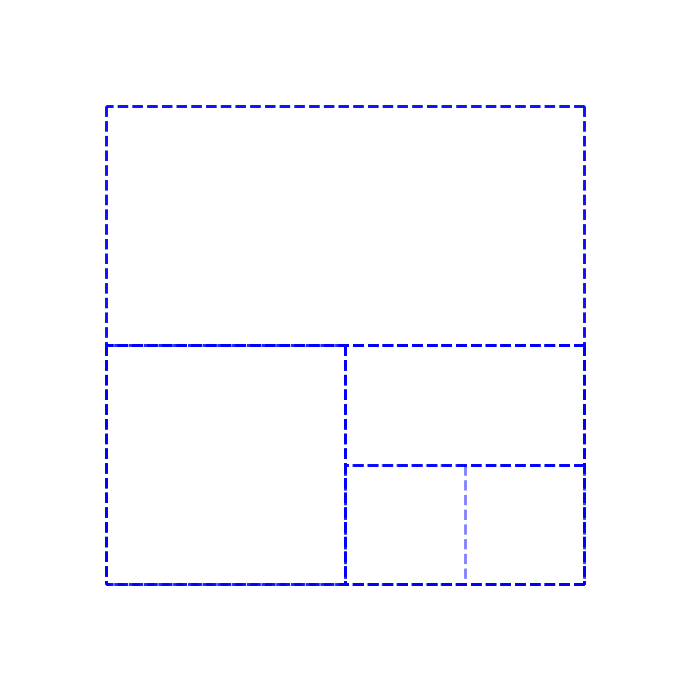

In [110]:
plter = Plotter()

# space = [BB_node(np.infty, -np.infty, [0, 0], [1, 1], scoreFunction=0, depth=0)]
space = []
plter.plotSpace([], [0, 0], [1, 1])

space.append(BB_node(np.infty, -np.infty, [0, 0], [1, 1/2], scoreFunction=1, depth=1))
space.append(BB_node(np.infty, -np.infty, [0, 1/2], [1, 1], scoreFunction=1, depth=1))
plter.plotSpace(space, [0, 0], [1, 1])

space.append(BB_node(np.infty, -np.infty, [0, 0], [1/2, 1/2], scoreFunction=1, depth=1))
space.append(BB_node(np.infty, -np.infty, [1/2, 0], [1, 1/2], scoreFunction=1, depth=1))
plter.plotSpace(space, [0, 0], [1, 1])

space.append(BB_node(np.infty, -np.infty, [1/2, 0], [1, 1/4], scoreFunction=1, depth=1))
space.append(BB_node(np.infty, -np.infty, [1/2, 1/4], [1, 1/2], scoreFunction=1, depth=1))
plter.plotSpace(space, [0, 0], [1, 1])

space.append(BB_node(np.infty, -np.infty, [1/2, 0], [3/4, 1/4], scoreFunction=1, depth=1))
space.append(BB_node(np.infty, -np.infty, [3/4, 1/4], [1, 1/4], scoreFunction=1, depth=1))
plter.plotSpace(space, [0, 0], [1, 1])

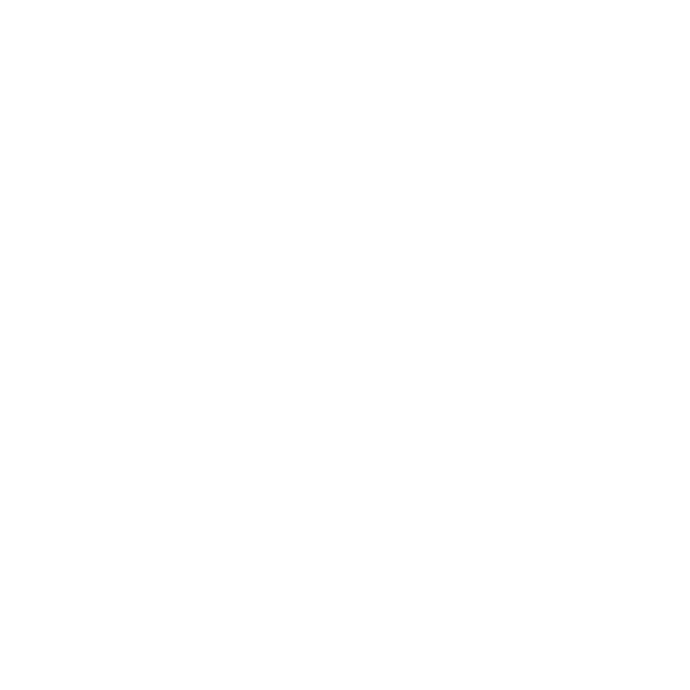

In [111]:
plter.showAnimation([], 100)